In [1]:
import numpy as np
import pandas as pd

#import time dependencies
from datetime import datetime
import time
from datetime import date, timedelta
import datetime
import itertools as it

# Visualizing Data
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.lines as mlines
import matplotlib.ticker as mticker
import matplotlib.ticker as mtick
import matplotlib as mpl
from matplotlib import colors

# Stats
from scipy.stats import chi2
import collections
import random
import seaborn as sns
from scipy.stats import linregress
from scipy import stats
import statistics as st

#Web Scrapping
from bs4 import BeautifulSoup
from urllib.request import Request, urlopen
from collections import Counter
import requests
import re
import csv

In [2]:
#the data in this script is Discrete Data 
#probability mass function-assigns a probability to each possible value
#https://towardsdatascience.com/plotting-probabilities-for-discrete-and-continuous-random-variables-353c5bb62336

# Web Scrapping Lottery Numbers

In [3]:
# https://www.usamega.com/mega-millions/results/

In [4]:
page_num = 1
total_pages = 63
date=[]
winning_numbers=[]
mega_millions_numbers=[]
pages = np.arange(1, 2, 1)

while True:
    if page_num > total_pages: break
    page_num = str(page_num)
    url='https://www.usamega.com/mega-millions/results/'+page_num
    response = requests.get(url, timeout=5)
    soup = BeautifulSoup(response.content, "html.parser")

    for row in soup.select('tbody tr'):
        row_text = [x.text for x in row.find_all('li')]
        winning_numbers.append(row_text)
    page_num = int(page_num)
    page_num += 1

In [5]:
x=[i[:5] for i in winning_numbers]

In [6]:
gold=[i[5] for i in winning_numbers]
gold = list(map(int, gold))

In [7]:
x=x[1:30]
gold_list=gold[0:50]

In [8]:
lst=list(map(float, it.chain.from_iterable(x)))
lst = list(map(int, lst))
lst[:5]

[1, 10, 18, 20, 46]

# Winning Numbers

In [9]:
#count the number of times a # occurs in lst then sort them
d={}
[ d.update( {i:d.get(i, 0)+1} ) for i in lst ]
sorted_d = sorted(d.items())
#find the numbers that have not been called in the data set
#sort the list, and then look through a range from index 0 to 71
#Then if not in list return those numbers
lst.sort()
def find_missing(lst): 
    return [x for x in range(lst[0], lst[-1]+1)  if x not in lst]

###Finding numbers that are repeated exactly twice 
##there is an initial assumption that numbers repeated only twice are more likely to be called again than any other repetition
once=[
    item
    for item,  count in collections.Counter(lst).items()
    if count == 1]
repeats = [
    item 
    for item, count in collections.Counter(lst).items() 
    if count == 2]
most_common=[
    item 
    for item, count in collections.Counter(lst).items() 
    if count > 3]

## Statisitics

In [10]:
stdev = st.pstdev(lst)
print('Standard Deviation')
print(stdev)
variance = st.pvariance(lst)
print('Variance')
print(variance)

Standard Deviation
19.489520950315082
Variance
379.8414268727705


## Comparing Lists With and Without Numbers From The Last Bracket [60 to 70]

#### list Without Numbers From 60 to 70

In [11]:
# Numbers from 60 to 70 are uncommon 
# The following section analyzes the difference between lists with the numbers from 60 to 70 and lists without the numbers 60 to 70
lst_sixty=lst[0:59]
print('Mean')
print(st.mean(lst_sixty))
print('Median')
print(st.median(lst_sixty))
print('Variance')
print(st.variance(lst_sixty))
print('Standard Deviation')
print(st.stdev(lst_sixty))

Mean
17.033898305084747
Median
16
Variance
76.343658679135
Standard Deviation
8.737485832843165


#### list With Numbers From 60 to 70

In [12]:
lst
print('Mean')
print(st.mean(lst))
print('Median')
print(st.median(lst))
print('Variance')
print(st.variance(lst))
print('Standard Deviation')
print(st.stdev(lst))

Mean
37.11724137931034
Median
38
Variance
382.479214559387
Standard Deviation
19.557075818214415


#### example of how to calculate probablility

In [13]:
probabilitiz=[]
for x in lst:
    probabilitiz.append(x/len(lst))

## Visualizing Winning Numbers

#### Scatter Plot of Mega Millions Winning Numbers

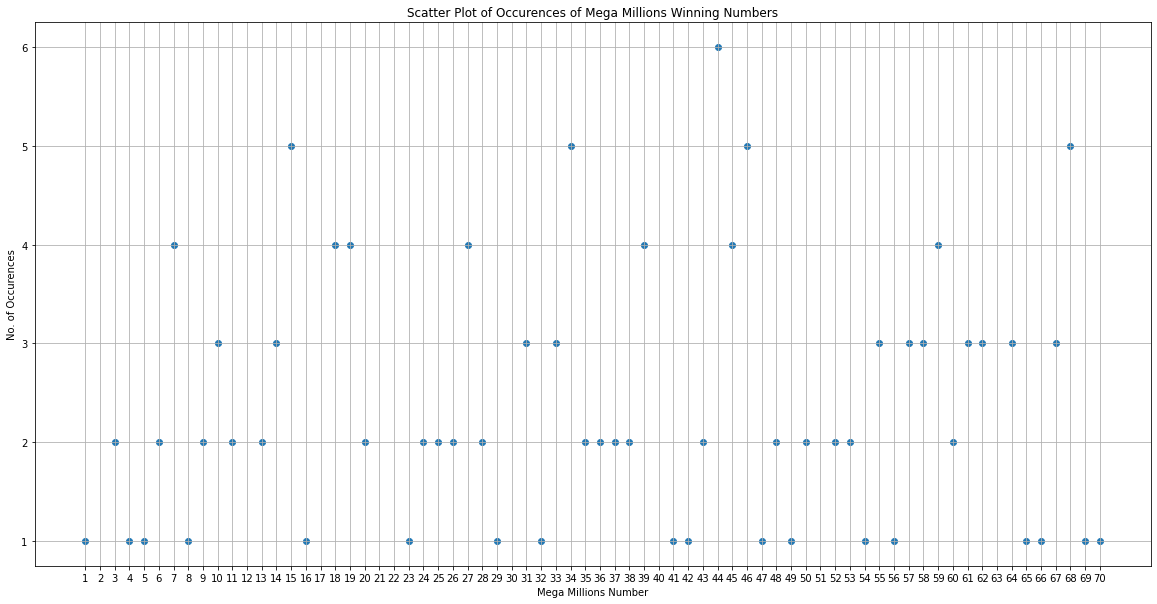

In [14]:
#unpack the list ofr x and y values using zip(data)
x, y = zip(*sorted_d)
#plot the # vs the number of occurces
fig = plt.figure(figsize = (20, 10))
plt.scatter(*zip(*sorted_d))
plt.xticks(np.arange(min(x), max(x)+1, 1.0))

plt.xlabel("Mega Millions Number") 
plt.ylabel("No. of Occurences") 
plt.title("Scatter Plot of Occurences of Mega Millions Winning Numbers") 
plt.grid()
 # Call save fig beforee plt.show 
plt.savefig("Images/MegaMillions_Scatter.png", bbox_inches='tight')
plt.show()

# Bins and Quartiles Examples

#### Equal Amount of Observations

In [15]:
Qcuts=pd.qcut(lst, q=4)
Qcuts.value_counts()

(0.999, 19.0]    38
(19.0, 38.0]     36
(38.0, 55.0]     37
(55.0, 70.0]     34
dtype: int64

#### Defined Number of Bins

In [16]:
pd.cut(lst, bins=4).value_counts()

(0.931, 18.25]    34
(18.25, 35.5]     34
(35.5, 52.75]     37
(52.75, 70.0]     40
dtype: int64

#### Defining Bin Bounaries

In [17]:
##linespace to provide an array of evenly spaced bins over a specified range
cut_bins = [0, 10, 20, 30, 40,50,60,70]
Cut_lst = pd.cut(lst, bins=cut_bins)

#### Defined Interval Ranges

In [18]:
interval_range = pd.interval_range(start=0, freq=10, end=70)
lst_interval = pd.cut(lst, bins=interval_range, labels=[1,2,3])
lst_interval

[(0, 10], (0, 10], (0, 10], (0, 10], (0, 10], ..., (60, 70], (60, 70], (60, 70], (60, 70], (60, 70]]
Length: 145
Categories (7, interval[int64]): [(0, 10] < (10, 20] < (20, 30] < (30, 40] < (40, 50] < (50, 60] < (60, 70]]

#### Frequency For Each Bin

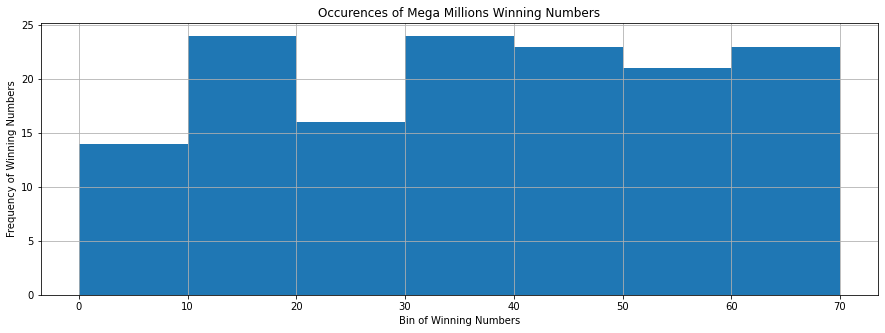

In [19]:
fig = plt.figure(figsize = (15, 5))
plt.hist(lst, bins=[0,10,20,30,40,50,60,70])  
plt.xlabel("Bin of Winning Numbers") 
plt.ylabel("Frequency of Winning Numbers") 
plt.title("Occurences of Mega Millions Winning Numbers")
plt.grid()
plt.savefig("Images/MegaMillions_BinFrequency.png", bbox_inches='tight')

#### Probability For Each Bin

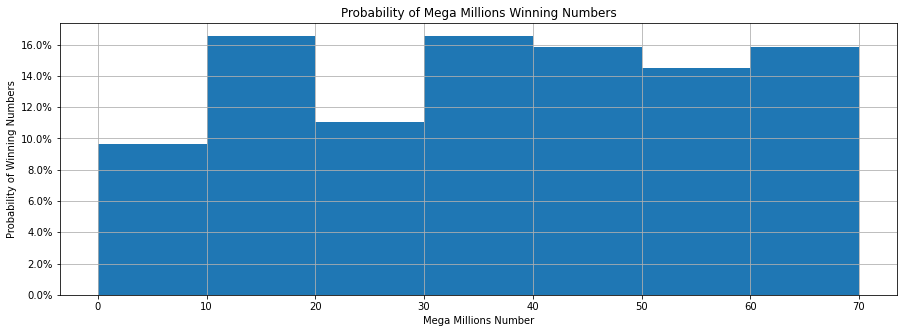

In [20]:
fig = plt.figure(figsize = (15, 5))
plt.hist(lst, bins=[0,10,20,30,40,50,60,70], density=True )    #density=True to convert to probablilities
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(.1))
plt.xlabel("Mega Millions Number") 
plt.ylabel("Probability of Winning Numbers") 
plt.title("Probability of Mega Millions Winning Numbers")
plt.grid()
plt.savefig("Images/MegaMillionsBinProbability.png", bbox_inches='tight')

#### Probability of Individual Numbers

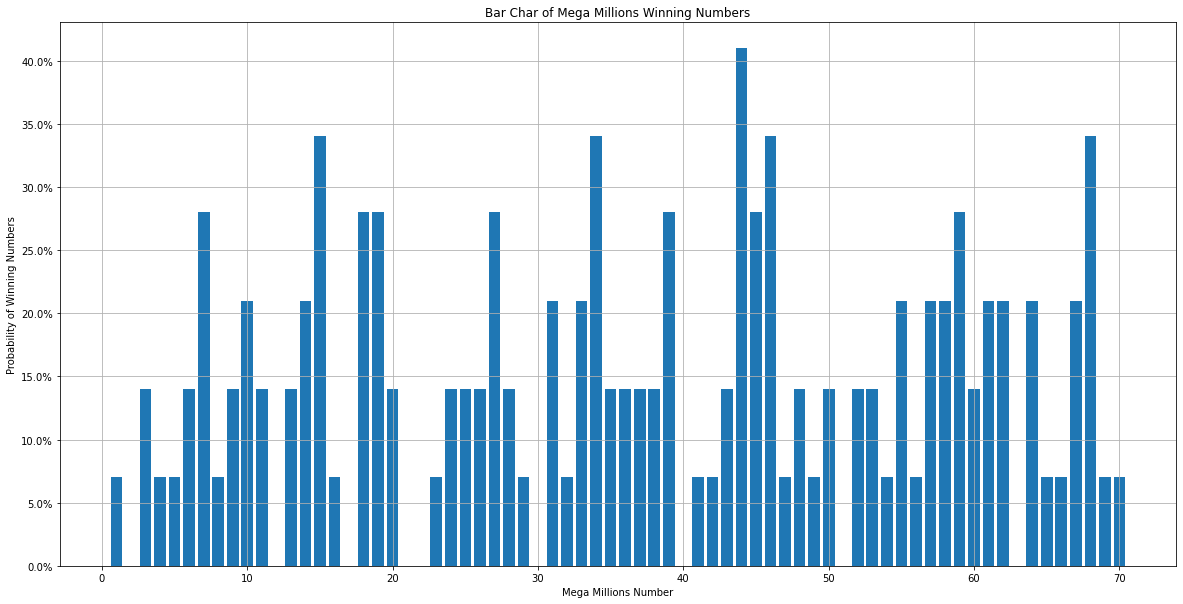

In [21]:
def frequencies(values):
    frequencies = {}
    for v in values:
        if v in frequencies:
            frequencies[v] += 1
        else:
            frequencies[v] = 1
    return frequencies
def probabilities(sample, freqs):
    probs = []
    for k,v in freqs.items():
        probs.append(round(v/len(sample),3))
    return probs
sample = lst                                    #lst is the list of numbers that are sorted
freqs = frequencies(sample)                     # frequency is how often the number occurs
probs = probabilities(sample, freqs)            #probabilility appends (#/length of the sample) to three decimal
x_axis = list(set(sample))                      # x_axis just counts the numbers from 1 to 70
fig = plt.figure(figsize = (20, 10))
plt.bar(x_axis, probs)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(.1))
plt.xlabel("Mega Millions Number") 
plt.ylabel("Probability of Winning Numbers") 
plt.title("Bar Char of Mega Millions Winning Numbers") 
plt.grid()
plt.savefig("Images/MegaMillionsProbabilityBar.png", bbox_inches='tight')
plt.show()

# Gold Number

#### Determine Which Numbers Are Most Likely To Be Called

In [22]:
#create a dictionary and count occurances in gold_list
g={}
[ g.update( {i:g.get(i, 0)+1} ) for i in gold_list ]
#sort the list
sorted_g=sorted(g.items())

gold_list.sort()
def find_missing(gold_list): 
    return [x for x in range(gold_list[0], gold_list[-1]+1)  if x not in gold_list]
print("Missing Numbers")
print(find_missing(gold_list))

###Finding numbers that are repeated exactly twice 
##there is an initial assumption that numbers repeated only twice are more likely to be called again than any other repetition
repeats_gold = [
    item 
    for item, count in collections.Counter(gold_list).items() 
    if count == 2
]
print("Repeats")
print(repeats_gold)

Missing Numbers
[4]
Repeats
[1, 10, 14, 15, 16, 21, 23]


#### Statistics

In [23]:
print('Standard Deviation')
stdevg = st.pstdev(gold_list)
print(stdevg)
print('Variance')
varianceg = st.pvariance(gold_list)
print(varianceg)

Standard Deviation
6.774776749089227
Variance
45.8976


# Visualizing Gold Number

#### Scatter Plot

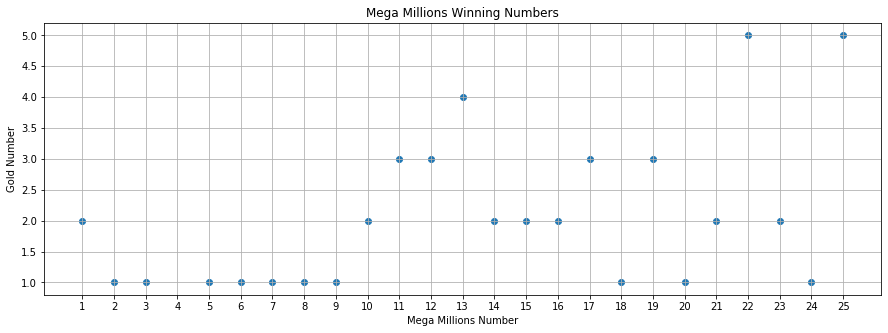

<Figure size 432x288 with 0 Axes>

In [24]:
#unpack the list ofr x and y values using zip(data)
x, y = zip(*sorted_g)
#plot the # vs the number of occurces
fig = plt.figure(figsize = (15, 5))
plt.scatter(*zip(*sorted_g))
plt.xticks(np.arange(min(x), max(x)+1, 1.0))

plt.xlabel("Mega Millions Number") 
plt.ylabel("Gold Number") 
plt.title("Mega Millions Winning Numbers") 
plt.grid()
plt.show() 
plt.savefig("MegaMillionsGold.png", bbox_inches='tight')
plt.savefig("Images/GoldScatter.png", bbox_inches='tight')
plt.show()

# Bins and Quartiles

#### Equal Amount of Observations

In [25]:
Qcutsg=pd.qcut(gold_list, q=4)
Qcutsg.value_counts()

(0.999, 11.0]    14
(11.0, 15.5]     11
(15.5, 21.75]    12
(21.75, 25.0]    13
dtype: int64

#### Defined Number of Bins

In [26]:
pd.cut(gold_list, bins=4).value_counts()

(0.976, 7.0]     7
(7.0, 13.0]     14
(13.0, 19.0]    13
(19.0, 25.0]    16
dtype: int64

#### Defining Bin Bounaries

In [27]:
cut_binsg = [0, 5,10,15,20,25]
Cut_lstg = pd.cut(gold_list, bins=cut_bins)
Cut_lstg

[(0, 10], (0, 10], (0, 10], (0, 10], (0, 10], ..., (20, 30], (20, 30], (20, 30], (20, 30], (20, 30]]
Length: 50
Categories (7, interval[int64]): [(0, 10] < (10, 20] < (20, 30] < (30, 40] < (40, 50] < (50, 60] < (60, 70]]

#### Evenly Spaced Bins

In [28]:
binzg=pd.cut(gold_list, bins=np.linspace(0, 25, 6))
binzg

[(0.0, 5.0], (0.0, 5.0], (0.0, 5.0], (0.0, 5.0], (0.0, 5.0], ..., (20.0, 25.0], (20.0, 25.0], (20.0, 25.0], (20.0, 25.0], (20.0, 25.0]]
Length: 50
Categories (5, interval[float64]): [(0.0, 5.0] < (5.0, 10.0] < (10.0, 15.0] < (15.0, 20.0] < (20.0, 25.0]]

#### Defined Interval Ranges

In [29]:
#use interval range for numbers and date ranges but cannot label bins
interval_rangeg = pd.interval_range(start=0, freq=5, end=25)
lst_intervalg = pd.cut(gold_list, bins=interval_rangeg, labels=[1,2,3])
lst_intervalg

[(0, 5], (0, 5], (0, 5], (0, 5], (0, 5], ..., (20, 25], (20, 25], (20, 25], (20, 25], (20, 25]]
Length: 50
Categories (5, interval[int64]): [(0, 5] < (5, 10] < (10, 15] < (15, 20] < (20, 25]]

#### Frequency Of Bins

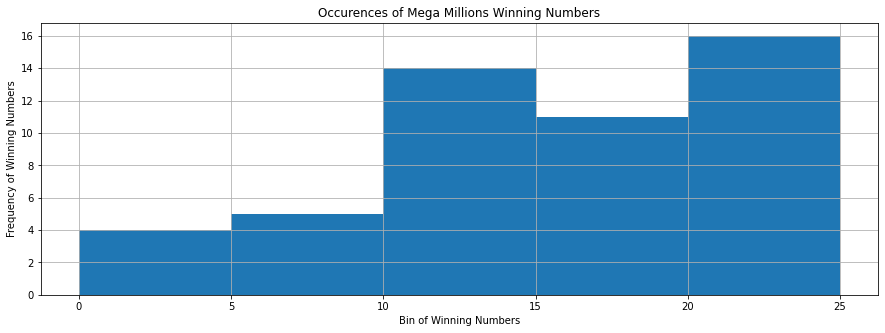

In [30]:
fig = plt.figure(figsize = (15, 5))
plt.hist(gold_list, bins=[0, 5, 10, 15, 20, 25])
plt.xlabel("Bin of Winning Numbers") 
plt.ylabel("Frequency of Winning Numbers") 
plt.title("Occurences of Mega Millions Winning Numbers")
plt.grid()
plt.savefig("Images/GoldBinFrequency.png", bbox_inches='tight')
plt.show()

#### Probability Of Bins

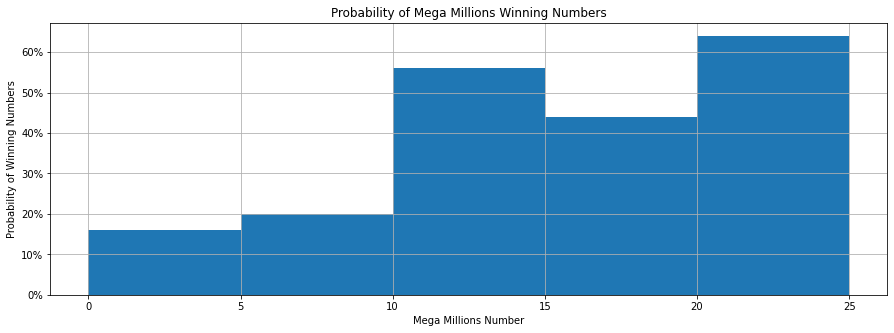

In [31]:
#The probability adds up to 100% because we have to multiply the probability of each of the bins by 5
fig = plt.figure(figsize = (15, 5))
plt.hist(gold_list, bins=[0, 5, 10, 15, 20, 25], density=True)          #density=True to get probability
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(.1))
plt.xlabel("Mega Millions Number") 
plt.ylabel("Probability of Winning Numbers") 
plt.title("Probability of Mega Millions Winning Numbers")
plt.grid()
plt.savefig("Images/GoldBinProbability.png", bbox_inches='tight')
plt.show()

#### Probability of Individual Winning Numbers

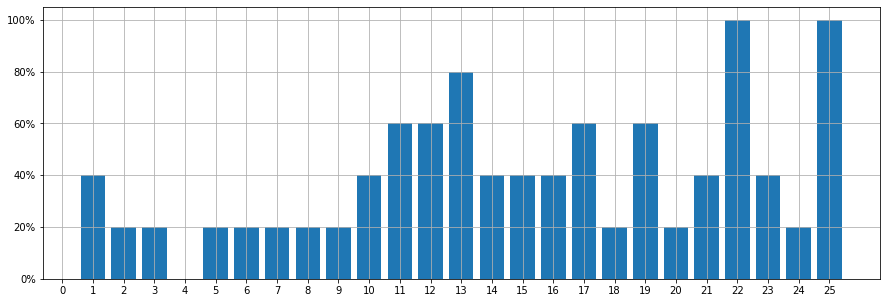

In [32]:
def frequenciesg(values):
    frequenciesg = {}
    for v in values:
        if v in frequenciesg:
            frequenciesg[v] += 1
        else:
            frequenciesg[v] = 1
    return frequenciesg
def probabilitiesg(samp, freqs):
    probs = []
    for k,v in freqs.items():
        probs.append(round(v/len(samp),3))
    return probs
sampg = gold_list                              #lst is the list of numbers that are sorted
freqsg = frequenciesg(sampg)                     # frequency is how often the number occurs
probsg = probabilitiesg(sampg, freqsg)            #probabilility appends (#/length of the sample) to three decimal
x_axis = list(set(sampg))                      # x_axis just counts the numbers from 1 to 25
fig = plt.figure(figsize = (15, 5))
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(.1))
plt.bar(x_axis, probsg)
plt.xticks(np.arange(0, 26, 1.0))
plt.grid()
plt.savefig("Images/GoldBar.png", bbox_inches='tight')
plt.show()

# Determine Most Likely Numbers

#### Pick Random Numbers

In [33]:
# Create a list of random numbers that could be choosen.
lotteryNumbers = []

for i in range (5):
    number = random.randint(0,60)
  #Check if this number has already been picked and ...
    while number in lotteryNumbers:
    # ... if it has, pick a new number instead 
        number = random.randint(0,60)
  
  #Now that we have a unique number, let's append it to our list.
    lotteryNumbers.append(number)

#Sort the list in ascending order
lotteryNumbers.sort()

#Display the list on screen:
print("Today's Random Numbers Are:") 
print(lotteryNumbers)

Today's Random Numbers Are:
[29, 30, 36, 40, 46]


In [38]:
###Finding numbers that are repeated exactly twice 
##there is an initial assumption that numbers repeated only twice are more likely to be called again than any other repetition
once=[
    item
    for item,  count in collections.Counter(lst).items()
    if count == 1]
repeats = [
    item 
    for item, count in collections.Counter(lst).items() 
    if count == 2]
most_common=[
    item 
    for item, count in collections.Counter(lst).items() 
    if count >= 3]

print("Numbers chosen once")
print(once)
print("Numbers chosen twice")
print(repeats)

lucky_Numbers=once+repeats+find_missing(lst)
lucky_Numbers.sort()
print('Lucky Numbers')
# Lucky Numbers are the numbers that have never been chose, chosen once, or chosen twice.
print(lucky_Numbers)

print("Most Common Numbers")
print(most_common)

Numbers that have been choosen only once
[1, 4, 5, 8, 16, 23, 29, 32, 41, 42, 47, 49, 54, 56, 65, 66, 69, 70]
Numbers that have been choosen only twice
[3, 6, 9, 11, 13, 20, 24, 25, 26, 28, 35, 36, 37, 38, 43, 48, 50, 52, 53, 60]
Lucky Numbers
[1, 2, 3, 4, 5, 6, 8, 9, 11, 12, 13, 16, 17, 20, 21, 22, 23, 24, 25, 26, 28, 29, 30, 32, 35, 36, 37, 38, 40, 41, 42, 43, 47, 48, 49, 50, 51, 52, 53, 54, 56, 60, 63, 65, 66, 69, 70]
Most Common Numbers
[7, 10, 14, 15, 18, 19, 27, 31, 33, 34, 39, 44, 45, 46, 55, 57, 58, 59, 61, 62, 64, 67, 68]


# Determine Most Likely Gold Numbers

#### Pick Random Numbers

In [35]:
# Create a list of random numbers that could be choosen.
GoldNumbers = []

for i in range (1):
    number = random.randint(10,25)
  #Check if this number has already been picked and ...
    while number in GoldNumbers:
    # ... if it has, pick a new number instead 
        number = random.randint(10,25)
  
  #Now that we have a unique number, let's append it to our list.
    GoldNumbers.append(number)

#Sort the list in ascending order
GoldNumbers.sort()

#Display the list on screen:
print("Today's Gold Number Is:") 
print(GoldNumbers)

Today's Gold Number Is:
[16]


#### Pick Numbers From Lucky Numbers List

In [37]:
def find_missing(gold_list): 
    return [x for x in range(gold_list[0], gold_list[-1]+1)  if x not in gold_list]
once_gold=[
    item
    for item,  count in collections.Counter(gold_list).items()
    if count == 1]
twice_gold = [
    item 
    for item, count in collections.Counter(gold_list).items() 
    if count == 2]
repeats_gold = [
    item 
    for item, count in collections.Counter(gold_list).items() 
    if count > 2]

print("Gold Numbers never chosen")
print(find_missing(gold_list))
print("Gold Numbers chosen once")
print(once_gold)
print("Gold Numbers chosen twice")
print(twice_gold)
print("GoldNumbers chosen more than twice")
print(repeats_gold)

gold_lucky_Numbers=once_gold+repeats_gold
gold_lucky_Numbers.sort()
print('Gold Numbers')
print(gold_lucky_Numbers)

Gold Numbers never chosen
[4]
Gold Numbers chosen once
[2, 3, 5, 6, 7, 8, 9, 18, 20, 24]
Gold Numbers chosen twice
[1, 10, 14, 15, 16, 21, 23]
GoldNumbers chosen more than twice
[11, 12, 13, 17, 19, 22, 25]
Gold Numbers
[2, 3, 5, 6, 7, 8, 9, 11, 12, 13, 17, 18, 19, 20, 22, 24, 25]
